Adult heart and CVPC integration with SCTransform

In [1]:
setwd("/projects/CARDIPS/analysis/scRNAseq_validation/heart")

In [2]:
load("Robj/obj.LV.integrated.R")

In [3]:
library(Seurat)
library(ggplot2)
library(patchwork)

In [4]:
obj <- RunPCA(obj, verbose = FALSE)

In [5]:
obj <- RunUMAP(obj, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:50:29 UMAP embedding parameters a = 0.9922 b = 1.112

10:50:30 Read 65076 rows and found 30 numeric columns

10:50:30 Using Annoy for neighbor search, n_neighbors = 30

10:50:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:50:49 Writing NN index file to temp file /tmp/6140690.1.juphigh.q/RtmpH2VZ5E/file28a817ee4e8b

10:50:49 Searching Annoy index using 1 thread, search_k = 3000

10:51:16 Annoy recall = 100%

10:51:17 Commencing smooth kNN distance calibration using 1 thread

10:

In [26]:
i <- ifelse(is.na(obj@meta.data$ident.cell), "Heart", obj@meta.data$ident.cell)

In [11]:
obj@meta.data$ident.cell <- i

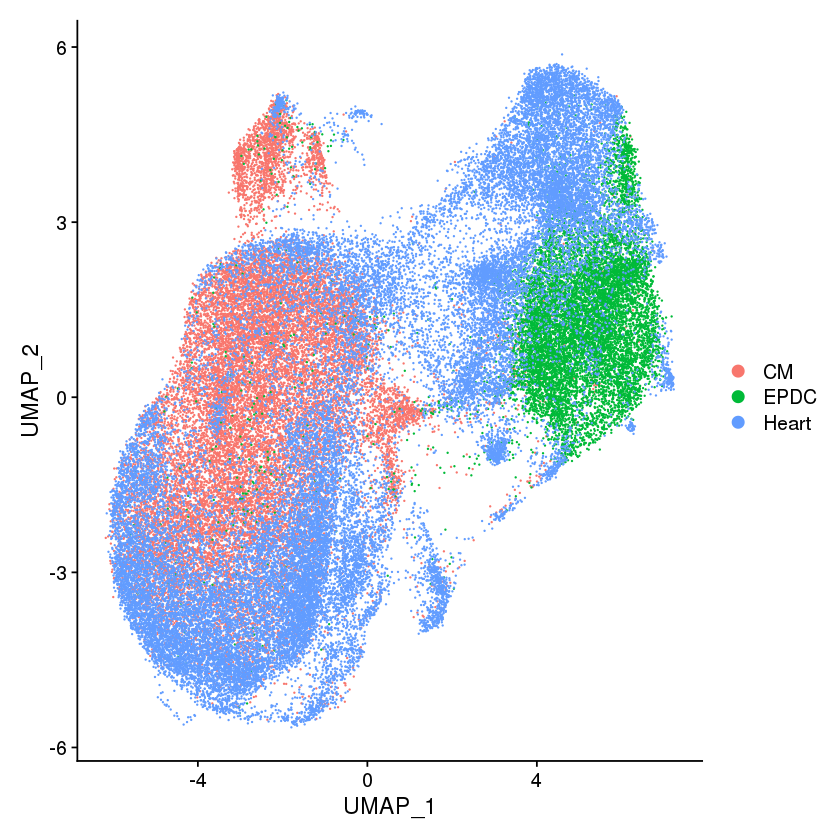

In [13]:
DimPlot(obj, group.by="ident.cell")

In [94]:
annot <- read.table("annotation_lookup.txt", header=T, sep="\t")
annot <- annot[!duplicated(annot$cluster),]
annot$annot <- ifelse(annot$annot=="", NA, annot$annot)

In [96]:
i <- apply(obj@meta.data[,c("ident.cell","ident.cluster")], 1, function(x) {
    if(is.na(x[2])) {
        return(x[1])
    } else {
        annot <- annot[annot$cluster==x[2], "annot"]
        if(length(annot) > 0) { return(annot) }
        else { return(NA) }
    }
})

In [97]:
obj <- AddMetaData(object=obj, metadata=i, col.name="ident.annot")

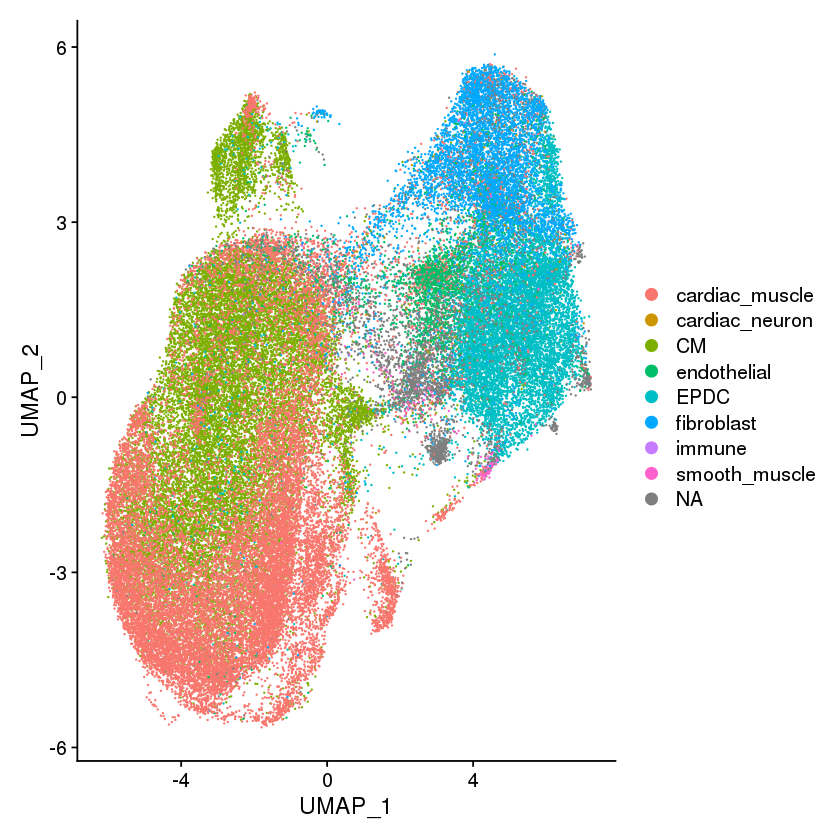

In [98]:
DimPlot(obj, group.by="ident.annot")

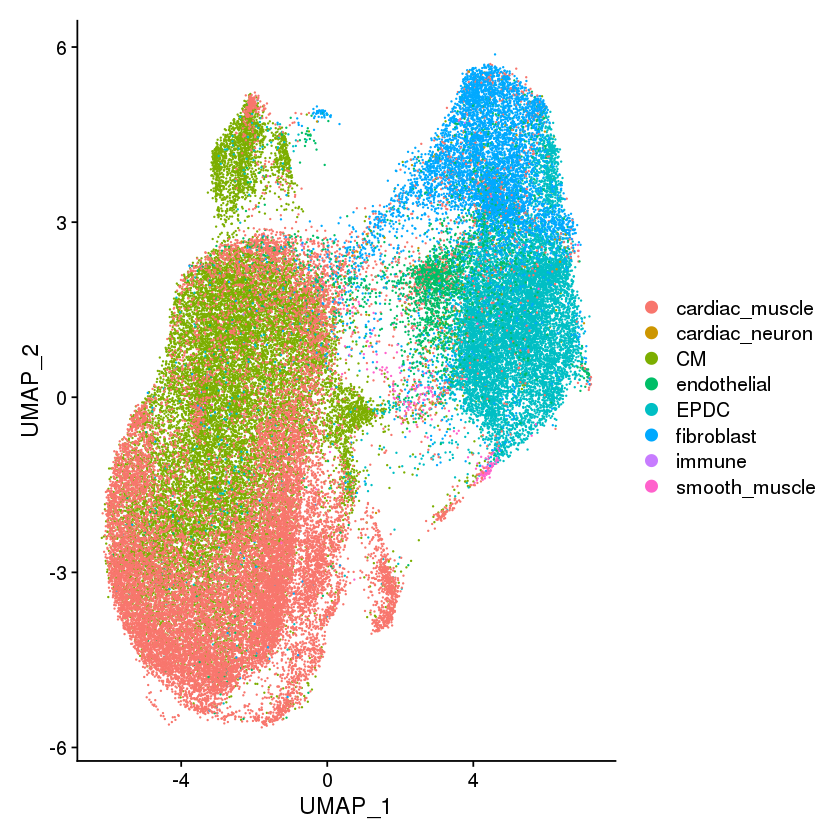

In [99]:
DimPlot(obj, group.by="ident.annot",
        cells=rownames(obj@meta.data)[which(!is.na(obj@meta.data$ident.annot))])

In [101]:
obj <- FindNeighbors(obj, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [102]:
obj <- FindClusters(obj, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 23
Elapsed time: 17 seconds


4 singletons identified. 19 final clusters.



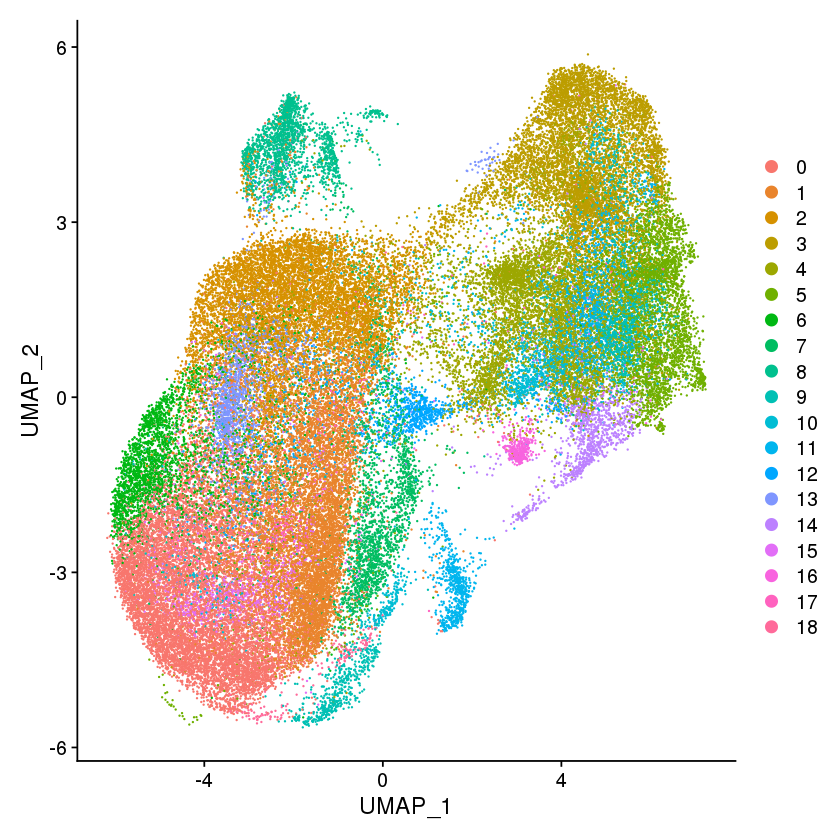

In [103]:
DimPlot(obj)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8902
Number of communities: 19
Elapsed time: 21 seconds


4 singletons identified. 15 final clusters.



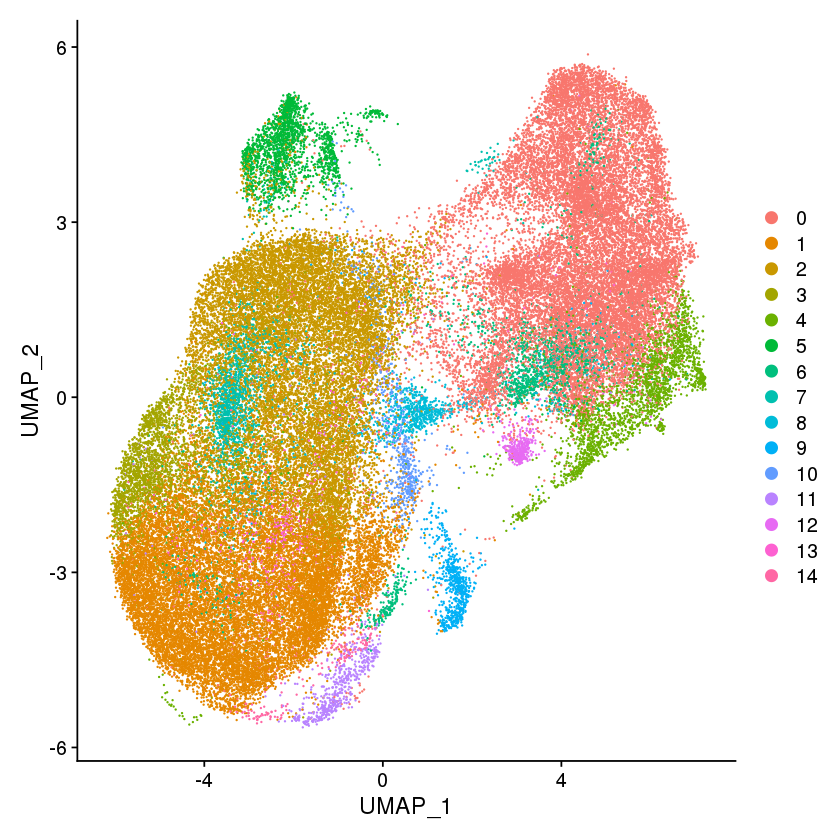

In [107]:
obj <- FindClusters(obj, resolution = 0.3)
DimPlot(obj)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9104
Number of communities: 15
Elapsed time: 19 seconds


4 singletons identified. 11 final clusters.



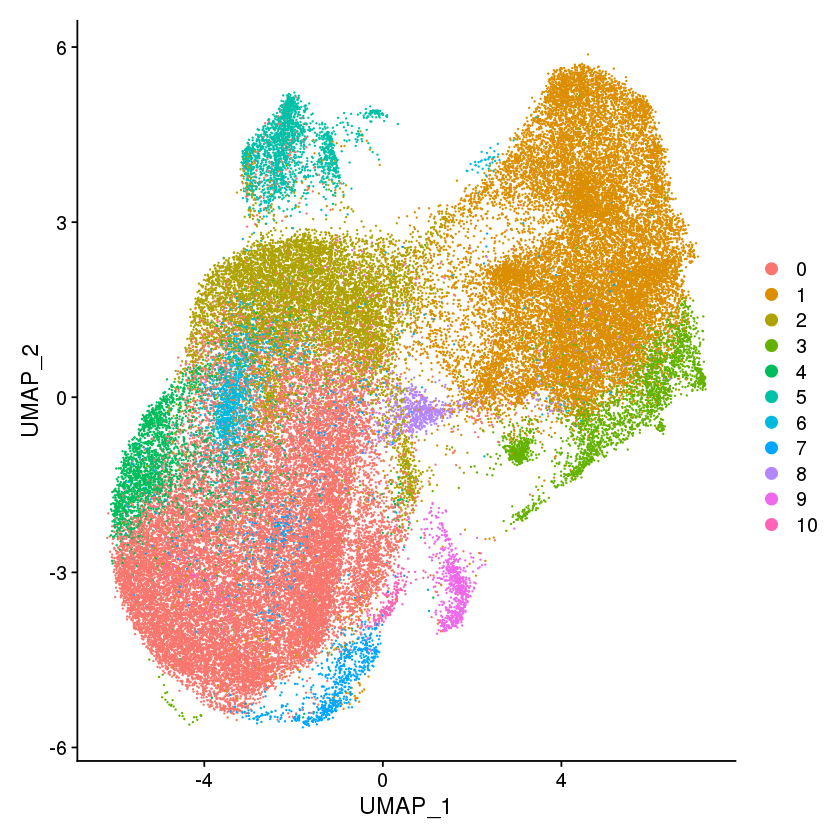

In [109]:
obj <- FindClusters(obj, resolution = 0.2)
DimPlot(obj)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 14
Elapsed time: 20 seconds


4 singletons identified. 10 final clusters.



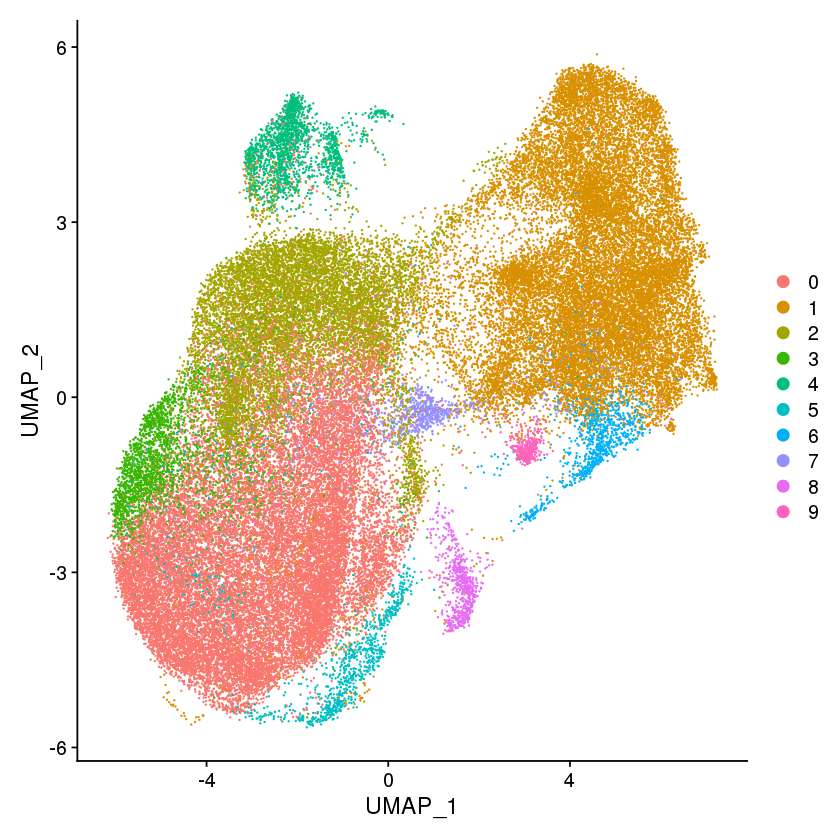

In [115]:
obj <- FindClusters(obj, resolution = 0.17)
DimPlot(obj)

In [116]:
save(obj, file="Robj/obj.LVC.R")

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 11
Elapsed time: 23 seconds


4 singletons identified. 7 final clusters.



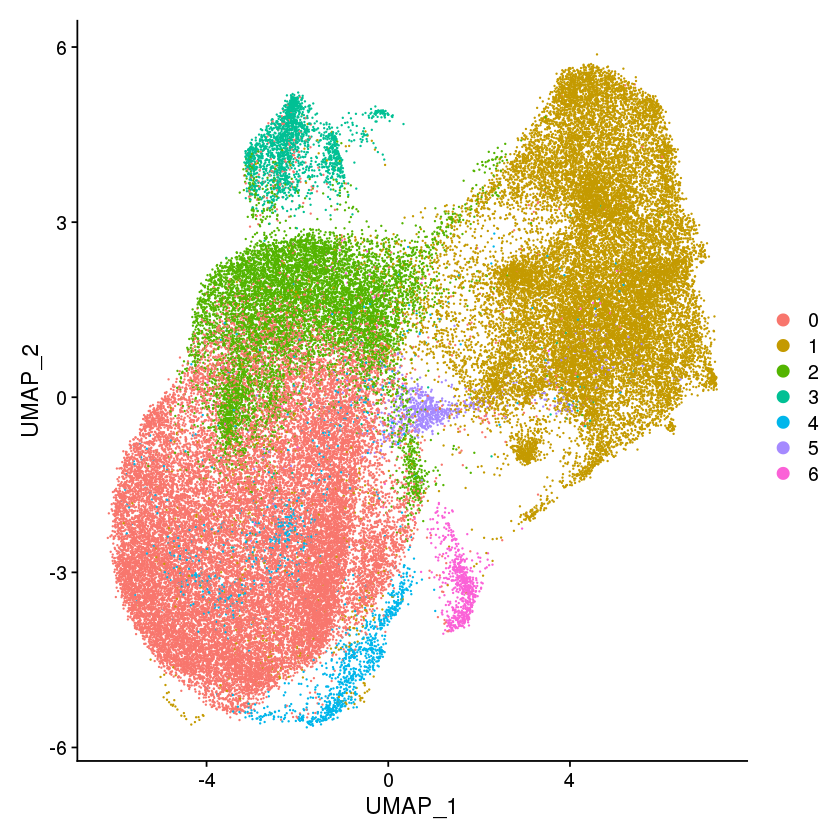

In [110]:
obj <- FindClusters(obj, resolution = 0.15)
DimPlot(obj)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65076
Number of edges: 2017708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9411
Number of communities: 9
Elapsed time: 16 seconds


4 singletons identified. 5 final clusters.



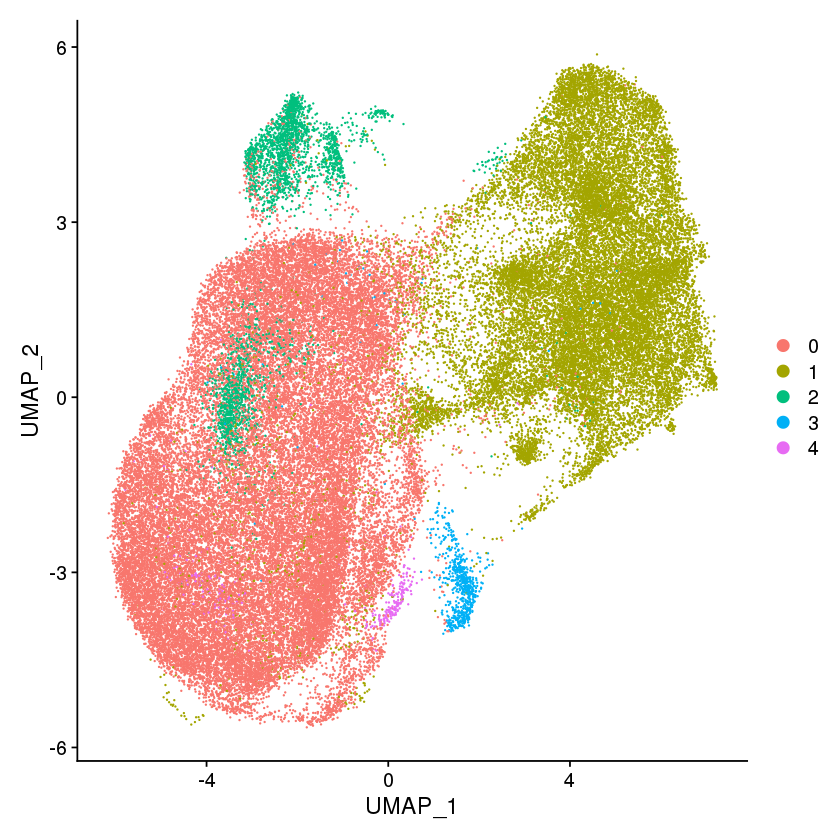

In [108]:
obj <- FindClusters(obj, resolution = 0.1)
DimPlot(obj)